



## To predict each adult’s income potential and classify them 
##according to the quantitative attributes.





In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import os
os.chdir('/drive/My Drive/batch45')

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the data

In [ ]:
df=pd.read_csv('adult.csv')

In [ ]:
df.shape

(48842, 15)

Understandung data

In [ ]:
df.head(5)

In [ ]:
df.describe()

Finding the null values

In [ ]:
df.isnull().sum()


There is no null values in any columns




Remove duplicate rows

In [ ]:
s=df.duplicated().any()
s

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

In [ ]:
df.info()


### Univariate Variable Analysis

$\bullet$Categorical Variable : workclass,education,maritual-status,occupation,

   relationship,race,gender,native-country,income

$\bullet\$Numerical Variable : age,fnlwgt,educational-num,capital-gain,

  capital-loss,houtrs-per-week

In [ ]:
numeric_columns=[]
categorical_columns=[]
for col in df.columns:
    if (df[col].dtype =="int64" ):
        numeric_columns.append(col)
    else:
      categorical_columns.append(col)

Categorical Variable

In [ ]:
def bar_plot(variable):
    var =df[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (6,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
for columns in categorical_columns:
  bar_plot(columns)

In [ ]:
ser1 = df["education"]
ser2 = df["marital-status"]
ser3 = df["occupation"]
order = ser1.append(ser2.append(ser3)).unique() 
plt.figure(figsize=(10,7))
ax = sns.countplot(x=ser3, palette='Set1', order=order, zorder=3)
ax = sns.countplot(x=ser2, palette='Set2', order=order, zorder=2)
ax = sns.countplot(x=ser1, palette='Set3', order=order)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=75,horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel("Labels")
plt.title("[Education | Marital-status  | Occupation ] Countplot")
plt.show()

In [ ]:
ser1 = df["relationship"]
ser2 = df["race"]
ser3 = df["workclass"]
order = ser1.append(ser2.append(ser3)).unique() 
plt.figure(figsize=(10,7))
ax = sns.countplot(x=ser3, palette='Set1', order=order, zorder=3) 
ax = sns.countplot(x=ser2, palette='Set2', order=order, zorder=2)
ax = sns.countplot(x=ser1, palette='Set3', order=order)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=75,horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel("Labels")
plt.title("[relationship | race | workclass ] Countplot")
plt.show()

In [ ]:
ser1 = df['native-country']
ser2 = df["gender"]
order = ser1.append(ser2).unique() 
plt.figure(figsize=(10,7))
ax = sns.countplot(x=ser2, palette='Set1', order=order, zorder=2)
ax = sns.countplot(x=ser1, palette='Set2', order=order)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=75,horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel("Labels")
plt.title("[relationship | race | workclass ] Countplot")
plt.show()

Numerical Variable

In [ ]:
_=df.hist(figsize=(7,8))

Outliers detection

In [ ]:
from collections import Counter

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
      Q1 =df[c].quantile(0.25)
      Q3 =df[c].quantile(0.75)
      IQR = Q3 - Q1
      outlier_list_col =df[(df[c] < (Q1 - 1.5 * IQR)) |(df[c] > (Q3 + 1.5 * IQR))].index
      outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
df.loc[detect_outliers(df,numeric_columns)]

In [ ]:
df =df.drop(detect_outliers(df,numeric_columns),axis = 0).reset_index(drop = True)

In [ ]:
df.shape

(48635, 15)

Missing values

In [ ]:
df['workclass'].unique()

In [ ]:
df['occupation'].value_counts()

In [ ]:
df['native-country'].value_counts()

Occupation,Native-country and work class columns has ? (missing values)

In [ ]:
df.shape

(48635, 15)

In [ ]:
len(df[df['workclass']=='?']),len(df[df['occupation']=='?']),len(df[df['native-country']=='?'])

(2795, 2805, 856)

Comparing with size of the data its very less we may delete data or impute the data here i am replacing ? with mode

In [ ]:
df['occupation']=df['occupation'].replace('?','Prof-specialty')

In [ ]:
df['native-country']=df['native-country'].replace('?','United-States')

In [ ]:
df['workclass']=df['workclass'].replace('?','Private')

In [ ]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married','Separated','Widowed'],
['not married','married','married','married','not married','not married','not married'], inplace = True)
df.replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov','State-gov','Without-pay', 'Never-worked'],
['Private','inc','inc','gov','gov','gov','Without-pay','Never-worked'], inplace = True)

Visualization

In [ ]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

In [ ]:
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

In [ ]:
df['income'].value_counts()

0    37109
1    11681
Name: income, dtype: int64

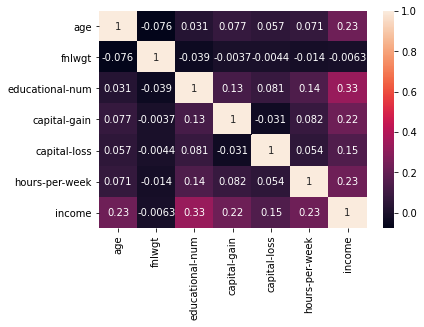

In [ ]:
sns.heatmap(df.corr(),annot=True)

educational_num feature seems to have correlation with income feature (0.33).

Bi variate analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


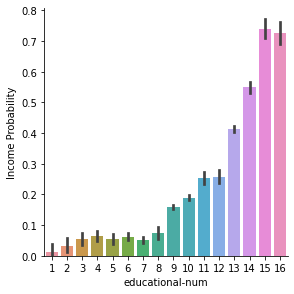

In [ ]:
g = sns.factorplot(x = "educational-num", y = "income", data = df, kind = "bar", size = 4)
g.set_ylabels("Income Probability")
plt.show()

if educational-num  is 15 more chance to get high income

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


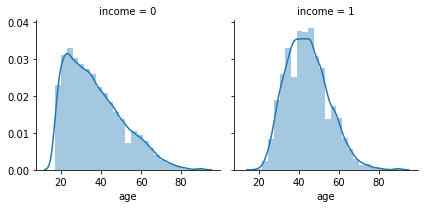

In [ ]:
g= sns.FacetGrid(df, col = "income")
g.map(sns.distplot, "age", bins = 25)
plt.show()

age <= 20 has a high income rate and age>80 has low income rate



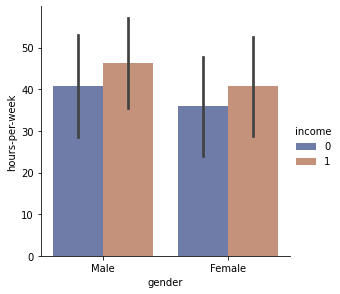

In [ ]:
sns.catplot(data=df, kind="bar",x="gender", y="hours-per-week", hue="income",ci="sd", palette="dark", alpha=.6, height=4)

Either male or female hours-per-week is high income also high

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 7.2+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


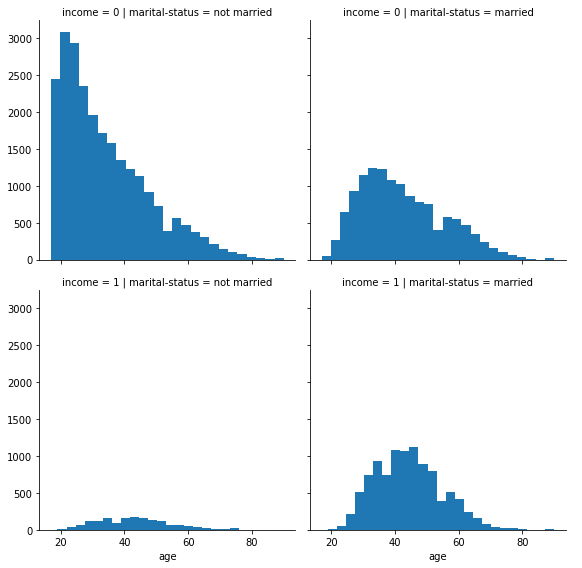

In [ ]:
g = sns.FacetGrid(df, col = "marital-status", row = "income", size = 4)
g.map(plt.hist, "age", bins = 25)
g.add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


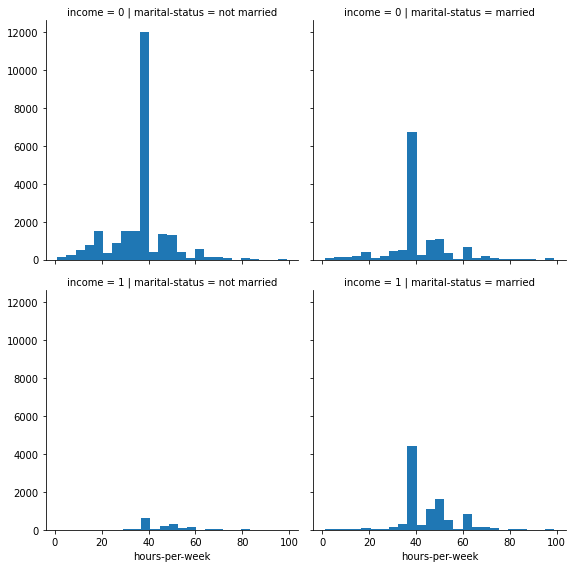

In [ ]:
g = sns.FacetGrid(df, col = "marital-status", row = "income", size = 4)
g.map(plt.hist, "hours-per-week", bins = 25)
g.add_legend()
plt.show()

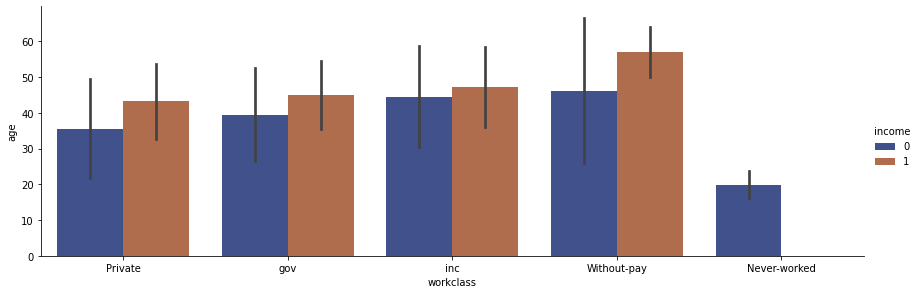

In [ ]:

sns.catplot(data=df, kind="bar",x="workclass", y="age", hue="income",ci="sd", palette="dark", alpha=.8, height=4,aspect=3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


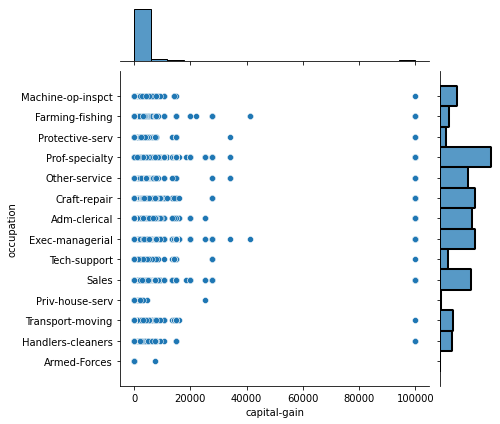

In [ ]:
sns.jointplot(df['capital-gain'],df['occupation'])

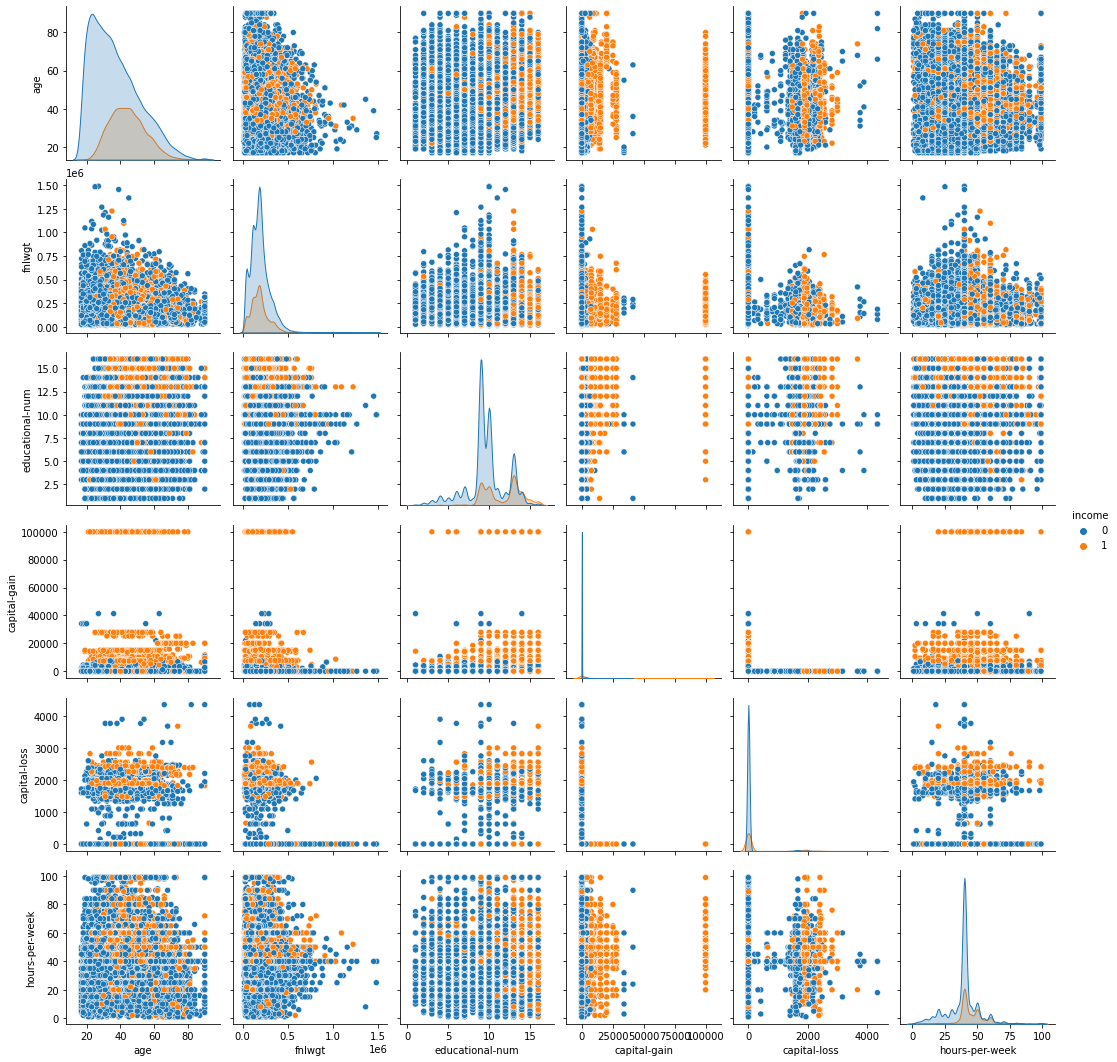

In [ ]:
sns.pairplot(df,hue='income')

Conclusion

Age,hours-per-week and educational-num is high they will have high probability to get high income

Central Limit Theorem Visualizations on age column

In [ ]:
from numpy import random
import random as ran

In [ ]:
age_without_outlires=finding_not_outliers(df,'age')

Took 10000 records from adult data set randomly 

In [ ]:
samples=[]
for i in range (10000):
  samples.append(random.randint(age_without_outlires['age']))

In [ ]:
def mean_fun(a):
  return sum(a)/len(a)

Now we are taking 50 random values of 1000 from 10000 random samples and calculated their means

In [ ]:
y=[]
temp=[]
for i in range(1000):
  for j in range(50):
    temp.append(ran.choice(samples))
  y.append(mean_fun(temp))
  temp=[]

Age column distribution

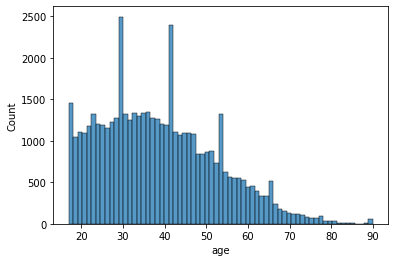

In [ ]:
sns.histplot(df['age'])

Sample means distribution

In [ ]:
plt.hist(y)

Chi-square test on occupation and gender columns

In [ ]:
df_cross_table=pd.crosstab(df['occupation'],df['gender'])

In [ ]:
df_cross_table

In [ ]:
observed_values=df_cross_table.values

In [ ]:
observed_values

In [ ]:
value=stats.chi2_contingency(df_cross_table)

In [ ]:
value

In [ ]:
Expected_values=value[3]

In [ ]:
from scipy.stats import  chi2

In [ ]:
chi_squ=0
for o,e in zip(observed_values,Expected_values):
  chi_squ=chi_squ+(((o-e)**2)/e)

In [ ]:
chi_squ_stat=chi_squ[0]+chi_squ[1]
chi_squ_stat

8699.500267454207

In [ ]:
critical_value=chi2.ppf(q=0.95,df=13)

In [ ]:
critical_value

22.362032494826934

In [ ]:
p_value=1-chi2.cdf(x=chi_squ_stat,df=13)

In [ ]:
p_value

0.0

By using critical value and chi_squ_stat i concluded occupation and gender columns  has a relation

feature transformation

In [ ]:
df['marital-status']=df['marital-status'].replace('not married',0)
df['marital-status']=df['marital-status'].replace('married',1)

In [ ]:
df['gender']=df['gender'].replace('Female',0)
df['gender']=df['gender'].replace('Male',1)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  int64 
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  int64 
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 7.2+ MB


Data for Model building

In [205]:
final_data = pd.get_dummies(df,columns=["workclass",'education','occupation','relationship','race','native-country'])


In [206]:
final_data.shape

(48790, 96)